In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/home/prg-user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [25]:
data = np.loadtxt("output.txt", skiprows = 1)
m_x = np.cos(data[:,1]-data[:,0])
H_ext = data[:200, 2]

<font size="4">  
We can plot the hysteresis curves for different field-to-easy axis angles $\gamma$ and observe the expected behavior:

• For $\gamma = 0^\circ$, we see that we have an almost perfectly square hysteresis curve, i.e. the magnetization abruptly switches from the $z$ to the $-z$ orientation (and vice versa) when the critical field is reached (in the dimensionless units, this is $H_c = 2$). Note that in the simulation itself, a bit of cheating is done as $\gamma$ is actually set to 1 degree, this is however a numerical compromise to ensure that the minimizer finds the energy minimum.

• For $\gamma = 90^\circ$, there is in fact no hysteresis and the magnetization rotates coherently and continously from one orientation to the other (it can however "choose" two directions along which it rotates).
   
• For $\gamma = 45^\circ$, we observe a more typical hysteresis curve, noteworthy here is that the critical field is in this special case exactly $H_C/2$ (this can also very elegantly be derived theoretically with some trigonometry and physics, which I will omit here). 
</font> 

Note: one thing that is noticeable right away is that for the angle 0/180 degrees, instead of the switching field being at $H_c = 2$, it happens a bit earlier, i.e. the hysteresis is not perfectly square, rather it has small 'tails'. This is a purely numerical artifact, as the minimizer has to take a small step in its search direction for the minimum and it prematurely collapses into the minimum.


Text(0, 0.5, 'm')

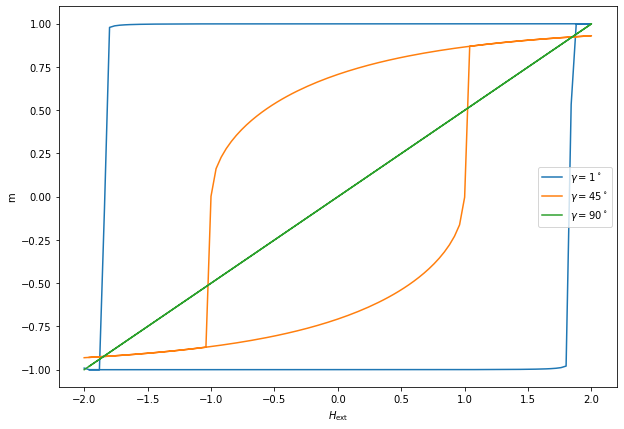

In [26]:
figure(figsize=(10,7))
plt.plot(H_ext, m_x[:200], label = r"$\gamma = 1^\circ$")
plt.plot(H_ext, m_x[200:400], label = r"$\gamma = 45^\circ$")
plt.plot(H_ext, m_x[400:600], label = r"$\gamma = 90^\circ$")
plt.legend()
plt.xlabel("$H_\mathrm{ext}$")
plt.ylabel("m")

<font size = "4">
    Below are some plots of the energy as a function of the magnetization-to-easy axis angle $\varphi$. It is obvious that with increasing external field strength, the two stable states/minima collapse to a single stable state.
</font>

Note: purely mathematically, the energetic state at $\varphi = 180^\circ$ would be stable, however this is in reality never the case due to thermal fluctuations/lattice vibrations etc. so a switching is always observed.

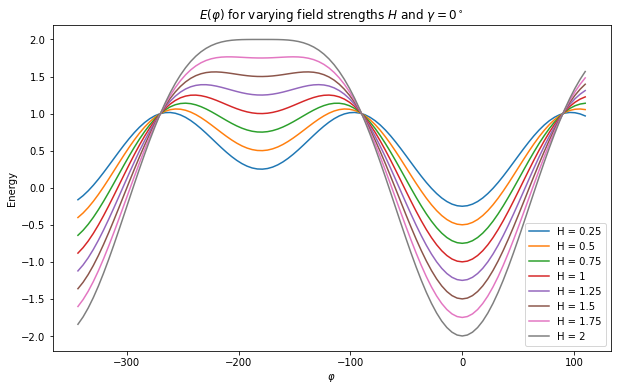

In [6]:
data_e = np.loadtxt("output_energies_gamma_0.txt", skiprows = 1)
phi = data_e[:,0]
energy = data_e[:,1]
figure(figsize=(10,6))
plt.plot(phi[:100], energy[:100], label = "H = 0.25")
plt.plot(phi[100:200], energy[100:200], label = "H = 0.5")
plt.plot(phi[200:300], energy[200:300], label = "H = 0.75")
plt.plot(phi[300:400], energy[300:400], label = "H = 1")
plt.plot(phi[400:500], energy[400:500], label = "H = 1.25")
plt.plot(phi[500:600], energy[500:600], label = "H = 1.5")
plt.plot(phi[600:700], energy[600:700], label = "H = 1.75")
plt.plot(phi[700:800], energy[700:800], label = "H = 2")
plt.xlabel(r"$\varphi$")
plt.ylabel("Energy")
plt.legend()
plt.title(r"$E(\varphi)$ for varying field strengths $H$ and $\gamma = 0^\circ$")
plt.show()

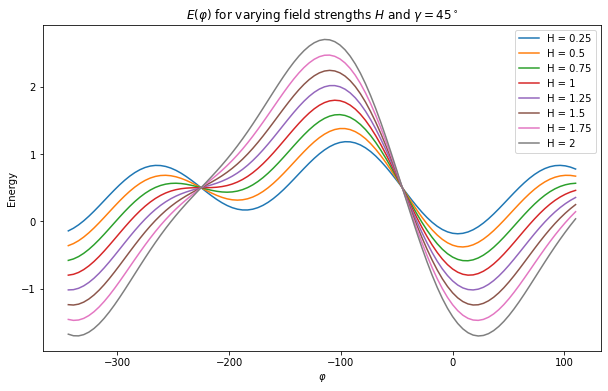

In [7]:
data_e = np.loadtxt("output_energies_gamma_45.txt", skiprows = 1)
phi = data_e[:,0]
energy = data_e[:,1]
figure(figsize=(10,6))
plt.plot(phi[:100], energy[:100], label = "H = 0.25")
plt.plot(phi[100:200], energy[100:200], label = "H = 0.5")
plt.plot(phi[200:300], energy[200:300], label = "H = 0.75")
plt.plot(phi[300:400], energy[300:400], label = "H = 1")
plt.plot(phi[400:500], energy[400:500], label = "H = 1.25")
plt.plot(phi[500:600], energy[500:600], label = "H = 1.5")
plt.plot(phi[600:700], energy[600:700], label = "H = 1.75")
plt.plot(phi[700:800], energy[700:800], label = "H = 2")
plt.xlabel(r"$\varphi$")
plt.ylabel("Energy")
plt.title(r"$E(\varphi)$ for varying field strengths $H$ and $\gamma = 45^\circ$")
plt.legend()
plt.show()

<font size = "4">
    Below we can see a Stoner Wohlfarth astroid curve. What it does is, it essentially separates regions where two minima of the SW energy (= magnetization orientations) can occur from regions where only one minimum exists. The magnetization would be a vector or a point inside the space described by $H_\parallel$ and $H_\perp$. Two stable states can be found 'inside' the astroid (and these can precisely be found by drawing tangents from $m$ onto the astroid), one stable state 'outside'. 
    
We can observe also as previously mentioned, that for $\gamma = 45^\circ$, which here corresponds to equal intensities of $H_\parallel$ and $H_\perp$, the curve is crossed approximately half the intensity of $H_c$ for e.g. $\gamma = 0^\circ$ or $180^\circ$ (corresponding to one of the 'spikes' of the astroid). 
    
    
The analytical expression for this curve is $\frac{\mu_0 M_s}{2k}H^{*}_\perp = \sin^3{\varphi}$ and $\frac{\mu_0 M_s}{2k}H^{*}_\parallel = -\cos^3{\varphi} $.
</font>

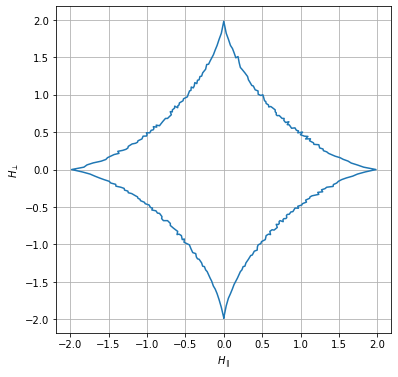

In [8]:
figure(figsize = (6,6))
data_astr = np.loadtxt("output_astroid.txt", skiprows = 1)
H_par = data_astr[:,0]
H_perp = data_astr[:,1]

plt.plot(H_par, H_perp)
plt.xlabel(r"$H_\parallel$")
plt.ylabel(r"$H_\perp$")
plt.grid()
plt.show()